In [151]:
# CNN model 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [152]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the data to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a channel dimension (grayscale)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Check the shapes to confirm correctness
print(train_images.shape)  # Should be (60000, 28, 28, 1)
print(train_labels.shape)  # Should be (60000, 10)
print(test_images.shape)   # Should be (10000, 28, 28, 1)
print(test_labels.shape)   # Should be (10000, 10)


(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [153]:
# Create the 
def create_better_cnn_model():
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Third convolutional layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.4))

    # Output layer with 10 classes
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-4), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [154]:
# Callbacks: Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


In [155]:
# Create the model
cnn_model = create_better_cnn_model()

# Train the model with data augmentation
history = cnn_model.fit(train_images, train_labels,
                        validation_data=(test_images, test_labels),
                        epochs=30,
                        batch_size=64,
                        callbacks=[early_stopping, reduce_lr])


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.6100 - loss: 1.7046 - val_accuracy: 0.8322 - val_loss: 0.9729 - learning_rate: 1.0000e-04
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - accuracy: 0.8221 - loss: 1.0082 - val_accuracy: 0.8542 - val_loss: 0.8688 - learning_rate: 1.0000e-04
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 80ms/step - accuracy: 0.8564 - loss: 0.8644 - val_accuracy: 0.8728 - val_loss: 0.7781 - learning_rate: 1.0000e-04
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - accuracy: 0.8760 - loss: 0.7654 - val_accuracy: 0.8757 - val_loss: 0.7173 - learning_rate: 1.0000e-04
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - accuracy: 0.8885 - loss: 0.6816 - val_accuracy: 0.8740 - val_loss: 0.6816 - learning_rate: 1.0000e-04
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 78ms/step - accuracy: 0.9015 - loss: 0.6031 - val_accuracy: 0.8901 - val_loss: 0.6059 - learning_rate: 1.0000e-04
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 78ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8925 - loss: 0.4743
Test accuracy: 0.8934000134468079


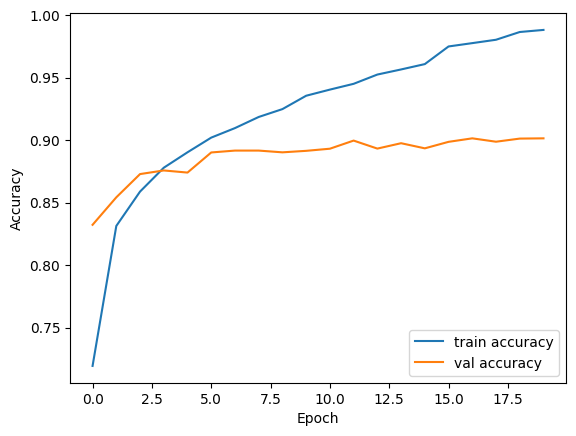

In [156]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [159]:
# Improved VGG16 Base Model with Fine-Tuning
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt


In [160]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the data to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a channel dimension (grayscale channel size 1)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Resize images to 48x48 to fit VGG16 input size
train_images_resized = tf.image.resize(train_images, [48, 48])
test_images_resized = tf.image.resize(test_images, [48, 48])

# Convert grayscale (single channel) to RGB (3 channels)
train_images_rgb = tf.image.grayscale_to_rgb(train_images_resized)
test_images_rgb = tf.image.grayscale_to_rgb(test_images_resized)

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Check the shapes to verify
print(train_images_rgb.shape) 
print(test_images_rgb.shape)  


(60000, 48, 48, 3)
(10000, 48, 48, 3)


In [161]:
# Load VGG16 without the top layers
vgg_base = VGG16(include_top=False, input_shape=(48, 48, 3), weights='imagenet')

# Unfreeze the last few layers for fine-tuning
for layer in vgg_base.layers[:-4]:
    layer.trainable = False

# Build the model
model = Sequential([
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [162]:
# Compile the model with a learning rate scheduler
model.compile(optimizer=Adam(learning_rate=0.0005),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler to reduce learning rate if accuracy plateaus
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)


In [163]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the datagen on training data
datagen.fit(train_images_rgb)


In [164]:
# Train the model
history = model.fit(datagen.flow(train_images_rgb, train_labels, batch_size=64),
                    validation_data=(test_images_rgb, test_labels),
                    epochs=30,
                    callbacks=[lr_reduction])


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 693s 733ms/step - accuracy: 0.6060 - loss: 1.0905 - val_accuracy: 0.8615 - val_loss: 0.3918 - learning_rate: 5.0000e-04
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 687s 732ms/step - accuracy: 0.8578 - loss: 0.4217 - val_accuracy: 0.8742 - val_loss: 0.3736 - learning_rate: 5.0000e-04
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 691s 736ms/step - accuracy: 0.8746 - loss: 0.3641 - val_accuracy: 0.8896 - val_loss: 0.3120 - learning_rate: 5.0000e-04
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 674s 718ms/step - accuracy: 0.8873 - loss: 0.3251 - val_accuracy: 0.8842 - val_loss: 0.3249 - learning_rate: 5.0000e-04
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 666s 709ms/step - accuracy: 0.8953 - loss: 0.3043 - val_accuracy: 0.9056 - val_loss: 0.2621 - learning_rate: 5.0000e-04
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 658s 701ms/step - accuracy: 0.9016 - loss: 0.2879 - val_accuracy: 0.8978 - val_loss: 0.2816 - learning_rate: 5.0000e-04
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 236ms/step - accuracy: 0.9196 - loss: 0.2644
Test accuracy with VGG16: 0.9223999977111816


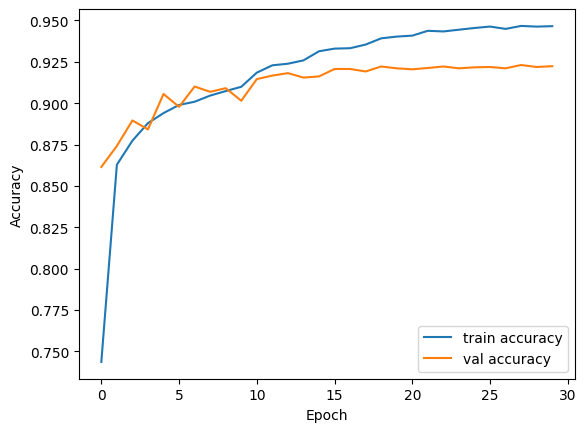

In [165]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_rgb, test_labels)
print(f"Test accuracy with VGG16: {test_acc}")

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
